In [2]:
# import the normal packages
import pandas as pd
import nflfastpy as nfl
from matplotlib import pyplot as plt
import seaborn as sns

# additional stuff that will help us later on
import requests
from io import BytesIO

/Users/moore_austin02/opt/anaconda3/lib/python3.9/site-packages/nflfastpy/__init__.py:16: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  default_headshot = mpl_image.imread(headshot_url)


In [3]:
# load in the play-by-play data
df = nfl.load_pbp_data(2021)

In [4]:
# see the first 5 rows of the dataset
df.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652


In [5]:
# see what the column names are
df.columns

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'out_of_bounds', 'home_opening_kickoff', 'qb_epa', 'xyac_epa',
       'xyac_mean_yardage', 'xyac_median_yardage', 'xyac_success', 'xyac_fd',
       'xpass', 'pass_oe'],
      dtype='object', length=372)

In [6]:
list[df]

list[       play_id          game_id  old_game_id home_team away_team season_type  \
0            1  2021_01_ARI_TEN   2021091207       TEN       ARI         REG   
1           40  2021_01_ARI_TEN   2021091207       TEN       ARI         REG   
2           55  2021_01_ARI_TEN   2021091207       TEN       ARI         REG   
3           76  2021_01_ARI_TEN   2021091207       TEN       ARI         REG   
4          100  2021_01_ARI_TEN   2021091207       TEN       ARI         REG   
...        ...              ...          ...       ...       ...         ...   
50177     3546    2021_20_SF_GB   2022012202        GB        SF        POST   
50178     3563    2021_20_SF_GB   2022012202        GB        SF        POST   
50179     3584    2021_20_SF_GB   2022012202        GB        SF        POST   
50180     3601    2021_20_SF_GB   2022012202        GB        SF        POST   
50181     3620    2021_20_SF_GB   2022012202        GB        SF        POST   

       week posteam posteam_type d

In [7]:
# look at specific columns
df[["posteam", "defteam", "pass", "rush", "epa", 'week', 'cpoe']].head()

,posteam,defteam,pass,rush,epa,week,cpoe
0,NaN,NaN,0,0,NaN,1,NaN
1,TEN,ARI,0,0,0.000000,1,NaN
2,TEN,ARI,0,1,-1.399805,1,NaN
3,TEN,ARI,1,0,0.032412,1,18.120378
4,TEN,ARI,1,0,-1.532898,1,-51.957655


In [8]:
qbs = df.groupby(['week', 'posteam'])


In [9]:
# let's rank offenses from best to worst using epa
df.groupby('posteam')[['epa']].mean().sort_values(by='epa', ascending=False)

,epa
posteam,
KC,0.125676
BUF,0.083549
GB,0.072740
TB,0.063569
LA,0.043598
NE,0.043025
LAC,0.042011
DAL,0.041554
IND,0.039431


In [10]:
# let's do the same for QB's
qbs = df.groupby(['passer_player_id','passer_player_name'], 
                 as_index=False).agg({'play_id':'count', 'epa':'mean','cpoe':'mean'})

# at least 200 plays
qbs = qbs.loc[qbs.play_id>150]

# sort by EPA
qbs.sort_values('epa', ascending=False, inplace=True)

# round to two decimal places where appropriate
qbs = qbs.round(2)

# rename columns
qbs.columns = ['ID','Player','Dropbacks','EPA','CPOE']

qbs

,ID,Player,Dropbacks,EPA,CPOE
3,00-0023459,A.Rodgers,321,0.26,5.82
70,00-0033873,P.Mahomes,776,0.22,3.38
12,00-0026498,M.Stafford,692,0.21,0.91
0,00-0019596,T.Brady,840,0.16,1.24
114,00-0036355,J.Herbert,710,0.15,-0.55
4,00-0023459,Aa.Rodgers,275,0.15,5.58
116,00-0036442,J.Burrow,655,0.14,6.92
85,00-0034857,J.Allen,696,0.14,2.16
58,00-0033077,D.Prescott,679,0.14,1.56
40,00-0031345,J.Garoppolo,520,0.14,1.78


In [11]:
# Now we're going to make a yards past the sticks graph

# filter to get the data we want
df_passes = df.loc[(df['pass_attempt'] == 1)]

# select the columns we need
df_passes = df_passes[['passer_player_id', 'passer_player_name', 'posteam', 'down', 'ydstogo', 'air_yards', 'epa', 'week', 'defteam','cpoe']]

# create a new column
df_passes['yards_past_sticks'] = df_passes['air_yards'] - df_passes['ydstogo']


# check the dataset to make sure everything is there
df_passes.head(10)

,passer_player_id,passer_player_name,posteam,down,ydstogo,air_yards,epa,week,defteam,cpoe,yards_past_sticks
3,00-0029701,R.Tannehill,TEN,2.0,13,2.0,0.032412,1,ARI,18.120378,-11.0
4,00-0029701,R.Tannehill,TEN,3.0,10,10.0,-1.532898,1,ARI,-51.957655,0.0
6,00-0035228,K.Murray,ARI,1.0,10,29.0,2.692890,1,TEN,65.055165,19.0
8,00-0035228,K.Murray,ARI,1.0,18,-4.0,-0.511090,1,TEN,11.109942,-22.0
9,00-0035228,K.Murray,ARI,2.0,17,20.0,2.182015,1,TEN,59.242308,3.0
14,00-0035228,K.Murray,ARI,2.0,24,4.0,-0.214039,1,TEN,16.434360,-20.0
15,00-0035228,K.Murray,ARI,3.0,16,16.0,-0.211302,1,TEN,-25.744438,0.0
19,00-0029701,R.Tannehill,TEN,2.0,11,NaN,-6.696360,1,ARI,NaN,NaN
22,00-0035228,K.Murray,ARI,1.0,5,5.0,-0.448301,1,TEN,-41.720089,0.0
23,00-0035228,K.Murray,ARI,2.0,5,5.0,-0.881277,1,TEN,-41.741523,0.0


In [12]:
qbs = df_passes.groupby(['week','passer_player_id', 'passer_player_name', 'posteam', 'defteam'], as_index=False).agg({'epa':'sum', 'cpoe':'mean'}).sort_values(by='epa', ascending=False)

qbs = qbs.rename(columns={'passer_player_name':'name'})

In [13]:
qbs1 = qbs[(qbs.name=='J.Fields') | (qbs.name=='M.Jones') | (qbs.name=='T.Lawrence') | (qbs.name=='T.Lance') | (qbs.name=='Z.Wilson') | (qbs.name=='D.Mills')][:200]
qb2 = qbs1

In [14]:
qb2

,week,passer_player_id,name,posteam,defteam,epa,cpoe
181,5,00-0036898,D.Mills,HOU,NE,17.818805,9.291649
637,17,00-0036972,M.Jones,NE,JAX,17.211687,9.980442
378,10,00-0036972,M.Jones,NE,CLE,16.184751,18.757368
591,16,00-0036898,D.Mills,HOU,LAC,16.025422,7.640280
255,7,00-0036972,M.Jones,NE,NYJ,15.442721,-0.617090
...,...,...,...,...,...,...,...
107,3,00-0036945,J.Fields,CHI,CLE,-21.839273,-39.036409
76,2,00-0037013,Z.Wilson,NYJ,NE,-23.702245,-7.356934
110,3,00-0037013,Z.Wilson,NYJ,DEN,-24.105391,-8.855352
254,7,00-0036945,J.Fields,CHI,TB,-25.489263,2.366526


In [29]:
roster_df = nfl.load_roster_data(2021)
roster_df['first_name'] = roster_df['first_name'].str[:1]
roster_df['name'] = roster_df['first_name'] + '.' + roster_df['last_name']

In [30]:
qbs3 = qb2.merge(roster_df[['headshot_url', 'name']], on='name')

In [37]:
colors = pd.read_csv('Teams.csv')
qbs3 = qbs3.merge(colors[['team_color', 'team_abbr']].rename(columns={'team_abbr': 'posteam'}), on='posteam')

In [39]:
df3 = qbs3.groupby(['passer_player_id', 'name', 'posteam', 'defteam', 'week', 'cpoe', 'team_color', 'headshot_url'], as_index=False)['epa'].sum().sort_values(by='epa', ascending=False)[:100]
df3

,passer_player_id,name,posteam,defteam,week,cpoe,team_color,headshot_url,epa
9,00-0036898,D.Mills,HOU,NE,5,9.291649,#03202F,https://static.www.nfl.com/image/private/f_aut...,17.818805
98,00-0036972,M.Jones,NE,JAX,17,9.980442,#002244,https://a.espncdn.com/combiner/i?img=/i/headsh...,17.211687
97,00-0036972,M.Jones,NE,JAX,17,9.980442,#002244,https://a.espncdn.com/combiner/i?img=/i/headsh...,17.211687
96,00-0036972,M.Jones,NE,JAX,17,9.980442,#002244,https://a.espncdn.com/combiner/i?img=/i/headsh...,17.211687
100,00-0036972,M.Jones,NE,JAX,17,9.980442,#002244,https://static.www.nfl.com/image/private/f_aut...,17.211687
...,...,...,...,...,...,...,...,...,...
58,00-0036972,M.Jones,NE,BUF,16,-18.908702,#002244,https://static.www.nfl.com/image/private/f_aut...,-3.096963
57,00-0036972,M.Jones,NE,BUF,16,-18.908702,#002244,https://static.www.nfl.com/image/private/f_aut...,-3.096963
55,00-0036972,M.Jones,NE,BUF,16,-18.908702,#002244,https://a.espncdn.com/combiner/i?img=/i/headsh...,-3.096963
39,00-0036971,T.Lawrence,JAX,SF,11,-1.201422,#006778,https://static.www.nfl.com/image/private/f_aut...,-3.115496


In [52]:
df3['name_week'] = df3['name'].map(str) + ', ' + df3['week'].map(str)
df3

,passer_player_id,name,posteam,defteam,week,cpoe,team_color,headshot_url,epa,name_week
9,00-0036898,D.Mills,HOU,NE,5,9.291649,#03202F,https://static.www.nfl.com/image/private/f_aut...,17.818805,"D.Mills, 5"
98,00-0036972,M.Jones,NE,JAX,17,9.980442,#002244,https://a.espncdn.com/combiner/i?img=/i/headsh...,17.211687,"M.Jones, 17"
97,00-0036972,M.Jones,NE,JAX,17,9.980442,#002244,https://a.espncdn.com/combiner/i?img=/i/headsh...,17.211687,"M.Jones, 17"
96,00-0036972,M.Jones,NE,JAX,17,9.980442,#002244,https://a.espncdn.com/combiner/i?img=/i/headsh...,17.211687,"M.Jones, 17"
100,00-0036972,M.Jones,NE,JAX,17,9.980442,#002244,https://static.www.nfl.com/image/private/f_aut...,17.211687,"M.Jones, 17"
...,...,...,...,...,...,...,...,...,...,...
58,00-0036972,M.Jones,NE,BUF,16,-18.908702,#002244,https://static.www.nfl.com/image/private/f_aut...,-3.096963,"M.Jones, 16"
57,00-0036972,M.Jones,NE,BUF,16,-18.908702,#002244,https://static.www.nfl.com/image/private/f_aut...,-3.096963,"M.Jones, 16"
55,00-0036972,M.Jones,NE,BUF,16,-18.908702,#002244,https://a.espncdn.com/combiner/i?img=/i/headsh...,-3.096963,"M.Jones, 16"
39,00-0036971,T.Lawrence,JAX,SF,11,-1.201422,#006778,https://static.www.nfl.com/image/private/f_aut...,-3.115496,"T.Lawrence, 11"


KeyError: 0

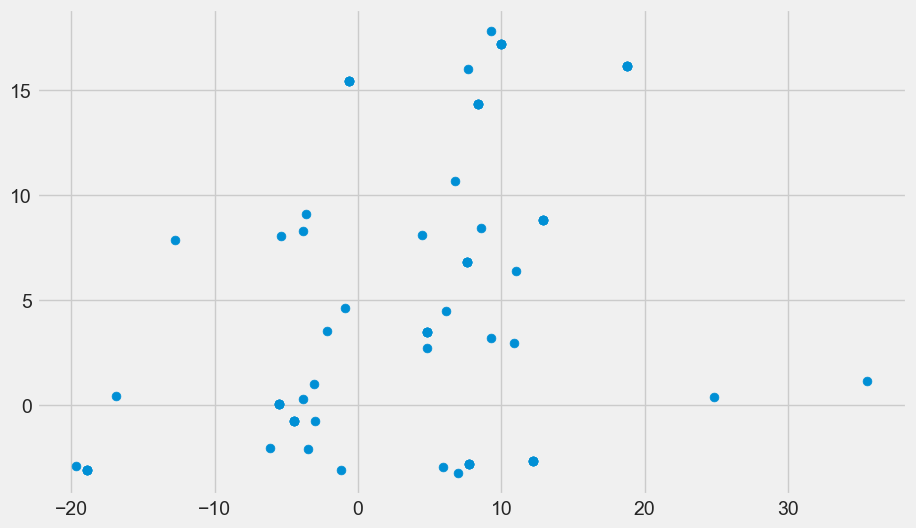

In [54]:
x = df3.cpoe
y = df3.epa
n = df3.name_week

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y,s=40) 
plt.style.use('fivethirtyeight')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y,s=.001) 
plt.style.use('seaborn-dark')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

TEXTS = []
for i in range(len(df3)):
    if NAMES[i]:
        x = df3["cpoe"].iloc[i]
        y = df3["epa"].iloc[i]
        text = NAMES[i]
        TEXTS.append(ax.text(x, y, text, color=GREY30, fontsize=14, fontname="Poppins"))


# Adjust text position and add arrows ----------------------------
# 'expand_points' is a tuple with two multipliers by which to expand
# the bounding box of texts when repelling them from points

# 'arrowprops' receives a dictionary with all the properties we want
# for the arrows
adjust_text(
    TEXTS, 
    expand_points=(2, 2),
    arrowprops=dict(
        arrowstyle="->", 
        color=GREY50, 
        lw=2
    ),
    ax=fig.axes[0]
)
fig


#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
    
#Adding labels and text\
#ax.set_title('Early Down Rush Rate by EPA per Play')
#ax.set_xlabel('Early Down Rush Rate', fontsize=14)
#ax.set_ylabel('EPA per Play', fontsize=14)
#plt.figtext(.78, .06, 'Data from nflfastR @AustinAnalytics', fontsize=10)
#plt.savefig('Early Down Run Rate by EPA per Play5.png')

In [21]:
fig = plt.figure(figsize = (7, 4))
plt.bar(top_10.name_week, top_10.epa, color=top_10['team_color'],
        width = 0.5)

#ax.xaxis_date()
fig.autofmt_xdate()

plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150 
plt.title('Rookie Best Performances 2021')
plt.ylabel("EPA in Game")
plt.xlabel("Passer Name, Week")
plt.style.use('seaborn-dark')
plt.savefig('Rookie_Best_Performances5.png')

NameError: name 'top_10' is not defined

<Figure size 700x400 with 0 Axes>

In [55]:
x = qb2.cpoe
y = qb2.epa

def getImage(path, zoom=.12):
    return OffsetImage(plt.imread(path), zoom=zoom)

paths = df3['team_logo_espn']

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y,s=.001) 
plt.style.use('seaborn-dark')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

TEXTS = []
for i in range(len(df3)):
    if NAMES[i]:
        x = penguins["flipper_length_mm"].iloc[i]
        y = penguins["bill_length_mm"].iloc[i]
        text = NAMES[i]
        TEXTS.append(ax.text(x, y, text, color=GREY30, fontsize=14, fontname="Poppins"))


# Adjust text position and add arrows ----------------------------
# 'expand_points' is a tuple with two multipliers by which to expand
# the bounding box of texts when repelling them from points

# 'arrowprops' receives a dictionary with all the properties we want
# for the arrows
adjust_text(
    TEXTS, 
    expand_points=(2, 2),
    arrowprops=dict(
        arrowstyle="->", 
        color=GREY50, 
        lw=2
    ),
    ax=fig.axes[0]
)
fig

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
    
#Adding labels and text\
ax.set_title('Early Down Rush Rate by EPA per Play')
ax.set_xlabel('Early Down Rush Rate', fontsize=14)
ax.set_ylabel('EPA per Play', fontsize=14)
plt.figtext(.78, .06, 'Data from nflfastR @AustinAnalytics', fontsize=10)
plt.savefig('Early Down Run Rate by EPA per Play5.png')

KeyError: 'team_logo_espn'

In [ ]:
roster_df = nfl.load_roster_data(2021)
roster_df['first_name'] = roster_df['first_name'].str[:1]
roster_df['name'] = roster_df['first_name'] + '. ' + roster_df['last_name']
roster_df